<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/AA_PRACTICA3_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AA_PRACTICA3_GRUPO_4

Daniel Alonso

Javier Arteaga

Marina Garrido

Elena González

### Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models
from keras import layers
%matplotlib inline


Vamos a **predecir** el **porcentaje de grasa corporal** de un **individuo** con ayuda de la siguiente base de datos.
https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

Las variables de la base de datos son:
- Density determined from underwater weighing
- Percent body fat from Siri's (1956) equation
- Age (years)
- Weight (lbs)
- Height (inches)
- Neck circumference (cm)
- Chest circumference (cm)
- Abdomen 2 circumference (cm)
- Hip circumference (cm)
- Thigh circumference (cm)
- Knee circumference (cm)
- Ankle circumference (cm)
- Biceps (extended) circumference (cm)
- Forearm circumference (cm)
- Wrist circumference (cm)

## Cargar los datos

In [ ]:
data = pd.read_csv('bodyfat.csv', encoding='latin-1')
data.head()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
# Imprimimos la forma de nuestra base de datos para realizar la separación de estos.
data.shape

(252, 15)

## Realizamos la partición de nuestros datos
En total tenemos 252 observaciones, por tanto 3/4 partes irán para entrenar nuestro modelo y 1/4 parte para el test.

In [ ]:
# Nuestro objetivo será calcular el porcentaje masa muscular por tanto añadiremos esa columna a nuestras targets

# 3/4 de 252
train_targets=data.BodyFat[:189]
# 1/4 de 252
test_targets=data.BodyFat[190:]
data=data.drop(['BodyFat'], axis=1)

# El resto de variables serán los datos del modelo
# 3/4 de 252
train_data=data[:189]
# 1/4 de 252
test_data=data[190:]

## Imprimimos la forma de los datos

In [ ]:
train_data.shape

(189, 14)

In [ ]:
test_data.shape

(62, 14)

In [ ]:
train_targets.shape

(189,)

In [ ]:
test_targets.shape

(62,)

## Preparamos los datos normalizándolos

In [ ]:
# Normalizamos basándonos en las características
##############################################
# Calculamos la media del primer eje de los datos de entrenamiento
mean = train_data.mean(axis=0)
print("##### Media de las 13 características de los datos de entrenamiento ##### ")
print(mean)
# A los datos de entrenamiento le restamos la media
train_data -= mean

# Calculamos la desviación estandar del primer eje de los datos de entrenamiento
std = train_data.std(axis=0)
print("##### Desviación estandar de las 13 características de los datos de entrenamiento ##### ")
print(std)
# A los datos de entrenamiento los dividimos por la desviación estándar
train_data /= std


# USAMOS LA MEDIA Y LA DESVIACIÓN ESTANDAR DE LOS DATOS DE 
# ENTRENAMIENTO PARA NORMALIZAR EL SET DE DATOS DE LOS DATOS DE TEST 
test_data -= mean
test_data /= std


##### Media de las 13 características de los datos de entrenamiento ##### 
Density      1.056924
Age         41.888889
Weight     178.469841
Height      70.240741
Neck        37.895767
Chest      100.125926
Abdomen     91.725397
Hip         99.893122
Thigh       59.613757
Knee        38.515344
Ankle       23.143915
Biceps      32.289947
Forearm     28.694709
Wrist       18.173016
dtype: float64
##### Desviación estandar de las 13 características de los datos de entrenamiento ##### 
Density     0.018409
Age        12.009453
Weight     29.818886
Height      3.966228
Neck        2.492880
Chest       8.167412
Abdomen    10.598002
Hip         7.353296
Thigh       5.527727
Knee        2.333641
Ankle       1.793139
Biceps      3.056377
Forearm     2.015254
Wrist       0.932773
dtype: float64


## Construimos el modelo 

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(90, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(90, activation='relu'))
    model.add(layers.Dense(1))
    # MSE: Mean Squared Error
    # MAE: Mean Absolute Error
    model.compile(optimizer='rmsprop', loss='mse', 
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) # metrics = ['mae']
    return model

## Realizamos las particiones de los datos de entrenamiento

In [ ]:
# 3/4 de 189 = 141
# 1/4 de 189 = 48
partial_train_data = train_data[:141]
partial_eval_train_data = train_data[142:]
partial_train_targets = train_targets[:141]
partial_eval_train_targets = train_targets[142:]

In [ ]:
# Llamamos a nuestra función de construir modelo
mymodel = build_model()

## Entrenamos nuestro modelo

Lo haremos con 100 épocas y un batch_size = 1

In [ ]:
history = mymodel.fit(partial_train_data, partial_train_targets,
            validation_data=(partial_eval_train_data, partial_eval_train_targets),
                        epochs=100, batch_size=1)

Epoch 1/100
141/141 [==============================] - 1s 3ms/step - loss: 243.0866 - mean_absolute_error: 13.1632 - val_loss: 84.4576 - val_mean_absolute_error: 7.4264
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 70.2180 - mean_absolute_error: 6.3927 - val_loss: 37.7253 - val_mean_absolute_error: 5.0606
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 33.8475 - mean_absolute_error: 4.1254 - val_loss: 20.7644 - val_mean_absolute_error: 3.6673
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 15.8590 - mean_absolute_error: 2.6642 - val_loss: 14.3638 - val_mean_absolute_error: 3.1115
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 8.3915 - mean_absolute_error: 2.0653 - val_loss: 12.0062 - val_mean_absolute_error: 2.7874
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: 6.6549 - mean_absolute_error: 1.8771 - val_loss: 13.0084 - val_mean_absolute_error: 2.668

In [ ]:
mae_history = history.history['val_mean_absolute_error']
accuracy= np.mean(mae_history)
accuracy

1.3768435555696488

Aún estamos desviados 1.37% de la masa corporal. 

In [ ]:
mse_history = history.history['val_loss']

Confrontamos en una gráfica de épocas en el eje de abcisas contra pérdida (MSE) en el eje de ordenadas

Podemos ver que a partir de la época 20 se genera sobreentrenamiento debido a que nuestro modelo deja de mejorar ya que como podemos ver la gráfica se estabiliza y dejamos de mejorar a partir de ese momento.

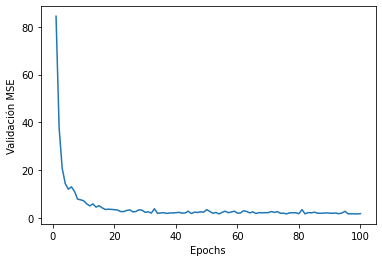

In [ ]:
plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

Esta gráfica nos sirve para visualizar como se ajustan los datos de validación con los de entreno, 
como están bastante juntos podemos asegurar que está funcionando correctamente

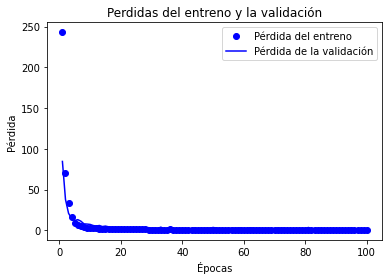

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Confrontamos en una gráfica de épocas en el eje de abcisas contra la métrica de 
error absoluto medio (MAE)

Esta gráfica nos ayuda a verificar que se genera sobreentramiento a partir de la época 20.

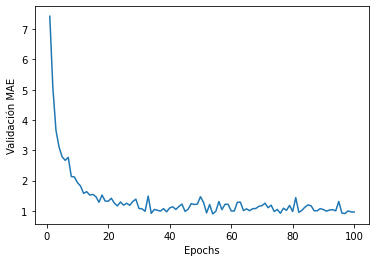

In [ ]:
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

Esta gráfica funciona algo peor que la anterior pero sigue funcionando bastante bien

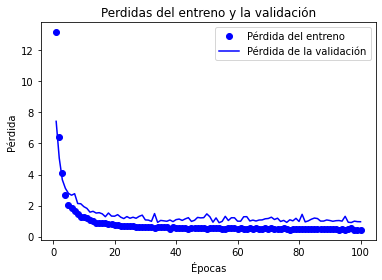

In [ ]:
loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Entrenamos de nuevo el modelo el número de épocas adecuado para evitar overfitting

In [ ]:
mymodel2 = build_model()
history2 = mymodel2.fit(partial_train_data, partial_train_targets,
            validation_data=(partial_eval_train_data, partial_eval_train_targets),
                        epochs=20, batch_size=1)

Epoch 1/20
141/141 [==============================] - 1s 3ms/step - loss: 253.0373 - mean_absolute_error: 13.8530 - val_loss: 72.1150 - val_mean_absolute_error: 6.5754
Epoch 2/20
141/141 [==============================] - 0s 2ms/step - loss: 69.6591 - mean_absolute_error: 6.1296 - val_loss: 37.2228 - val_mean_absolute_error: 4.8390
Epoch 3/20
141/141 [==============================] - 0s 2ms/step - loss: 32.3354 - mean_absolute_error: 3.9806 - val_loss: 21.0864 - val_mean_absolute_error: 3.6850
Epoch 4/20
141/141 [==============================] - 0s 2ms/step - loss: 16.1589 - mean_absolute_error: 2.7267 - val_loss: 12.0527 - val_mean_absolute_error: 2.9223
Epoch 5/20
141/141 [==============================] - 0s 2ms/step - loss: 11.0177 - mean_absolute_error: 2.2366 - val_loss: 8.5719 - val_mean_absolute_error: 2.4017
Epoch 6/20
141/141 [==============================] - 0s 2ms/step - loss: 7.6707 - mean_absolute_error: 1.7600 - val_loss: 8.0124 - val_mean_absolute_error: 2.3996
Epoch

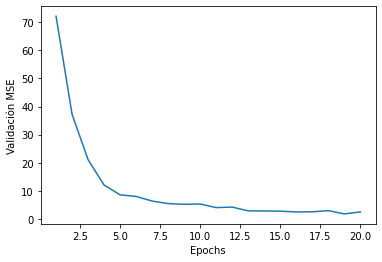

In [ ]:
mae_history2 = history2.history['val_mean_absolute_error']
mse_history2 = history2.history['val_loss']


plt.plot(range(1, len(mse_history2) + 1), mse_history2)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

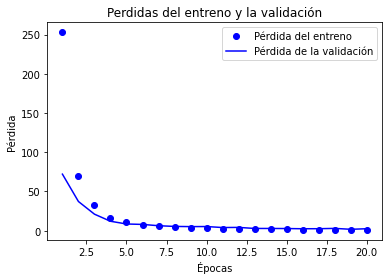

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

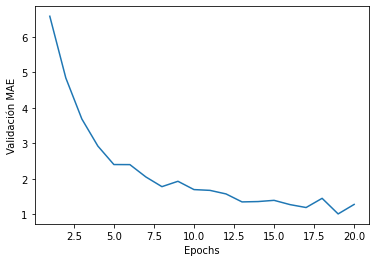

In [ ]:
plt.plot(range(1, len(mae_history2) + 1), mae_history2)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

Podemos ver como funciona bastante bien durante todas las épocas. Esto significa que hemos ajustado bien las épocas a nuestro modelo.

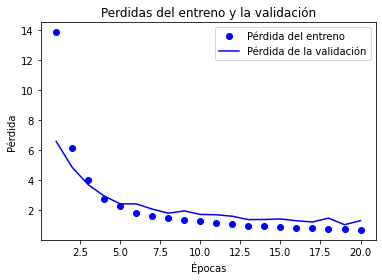

In [ ]:
loss = history2.history['mean_absolute_error']
val_loss = history2.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Validamos nuestro enfoque usando la **validación K-fold o K-iteraciones**

In [ ]:
import numpy as np

# k= 4 particiones
k = 4
num_val_samples = len(train_data) // k # 404//4=101
print("num_val_samples", num_val_samples)
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición #k
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de las demás particiones
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(train_data),"]")
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = build_model()
    # Entrenando el modelo (en modo silencioso, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evalua el modelo sobre los datos de validación
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

num_val_samples 47
processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 47 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 47 : 189 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 47 : 94 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 47 ]U[ 94 : 189 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 94 : 141 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 94 ]U[ 141 : 189 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 141 : 188 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 141 ]U[ 188 : 189 ]


In [ ]:
all_scores

[1.5663825273513794,
 1.0886306762695312,
 0.7022271752357483,
 0.9458131790161133]

In [ ]:
np.mean(all_scores)

1.0230272114276886

In [ ]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [ ]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición # k
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de todas la demás particiones
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(train_data),"]")
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = build_model()
    # Entrenando el modelo (en modo silencioso, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 47 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 47 : 189 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 47 : 94 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 47 ]U[ 94 : 189 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 94 : 141 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 94 ]U[ 141 : 189 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 141 : 188 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 141 ]U[ 188 : 189 ]


In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

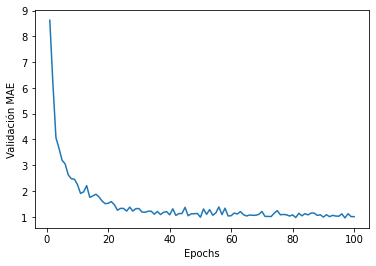

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

Al igual que con el método que hemos hecho antes de hacer los K-Folds vemos que se empieza a sobreentrenar alrededor de la época 20.

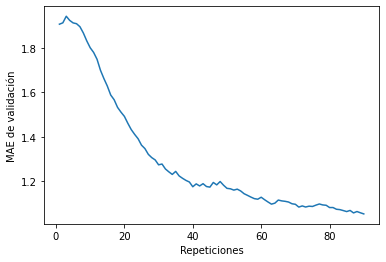

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Repeticiones')
plt.ylabel('MAE de validación')
plt.show()

In [ ]:
# Obtenemos un modelo compilado nuevo
model = build_model()
# Lo entrenamos en todos los datos.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

2/2 [==============================] - 0s 7ms/step - loss: 2.0041 - mean_absolute_error: 1.0902


In [ ]:
test_mae_score

1.0902025699615479

Aún estamos desviados 1.09% de la masa corporal.

Esto nos indica que si lo hacemos con K-Folds hemos conseguido disminuir nuestro índice de masa temporal de 1,37% a un 1,09% lo cúal es un cambio bastante significativo.